In [1]:
#Ремизов Никита Вячеславович
#Классификаторы - К-ближайших соседей (К=3), Логистическая регрессия; 
#Классы - Power Failure, Tool Wear Failure ; 
#Признаки - 'Air temperature [K]', 'Torque [Nm]'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB не по варианту

In [2]:
#задание - Классификаторы - К-ближайших соседей (К=3), Логистическая регрессия; 
names = [ "Logistic Regression", "Nearest Neighbors 3" ]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),  
    ]

In [3]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import preprocessing

#1. Загрузить датасет predictive_maintenance.csv.
df=pd.read_excel('predictive_maintenance.xlsx')
df


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [4]:
#оцениваем датасет
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [5]:
#смотрим какие классы есть
dataframe_classes = df['Failure Type'].value_counts()
dataframe_classes

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [6]:
#удаляем лишние классы, классифицировать будем только по заданию
#задание - Классы - Power Failure, Tool Wear Failure ; 
temp_ds = df[df['Failure Type'] != 'No Failure']
temp_ds = temp_ds[temp_ds['Failure Type'] != 'Heat Dissipation Failure']
temp_ds = temp_ds[temp_ds['Failure Type'] != 'Overstrain Failure']
temp_ds = temp_ds[temp_ds['Failure Type'] != 'Random Failures']
temp_ds['Failure Type'].value_counts()

Power Failure        95
Tool Wear Failure    45
Name: Failure Type, dtype: int64

In [7]:
df = temp_ds
#перекодируем классы
dict={'Power Failure':0, 'Tool Wear Failure':1}
df['TargetF']=df.replace({'Failure Type': dict})['Failure Type']
df['TargetF'].value_counts()

0    95
1    45
Name: TargetF, dtype: int64

In [8]:
#2. Подготовить выборки: обучающую 70% и тестовую 30%.
#задание - Признаки - 'Air temperature [K]', 'Torque [Nm]'
columns=['Air temperature [K]', 'Torque [Nm]']

In [9]:
#готовим признаки по заданию
x_label='Air temperature [K]'
y_label='Torque [Nm]'

X=df[[x_label, y_label]]
y = df['TargetF']
target_names = ['Power Failure','Tool Wear Failure']
print(X)
print(y)

      Air temperature [K]  Torque [Nm]
50                  298.9          4.6
69                  298.9         65.7
77                  298.8         41.3
168                 298.4         62.3
194                 298.2         10.7
...                   ...          ...
9576                299.6         23.3
9613                299.0         62.5
9758                298.6         16.2
9764                298.5         66.7
9974                298.6         68.2

[140 rows x 2 columns]
50      0
69      0
77      1
168     0
194     0
       ..
9576    1
9613    0
9758    1
9764    0
9974    0
Name: TargetF, Length: 140, dtype: int64


In [10]:
#минимаксная нормализация
scaler = preprocessing.MinMaxScaler()
scaled_features = scaler.fit_transform(X)
X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
X

,Air temperature [K],Torque [Nm]
50,0.367816,0.010989
69,0.367816,0.850275
77,0.356322,0.515110
168,0.310345,0.803571
194,0.287356,0.094780
...,...,...
9576,0.448276,0.267857
9613,0.379310,0.806319
9758,0.333333,0.170330
9764,0.321839,0.864011


In [11]:
X.describe()

,Air temperature [K],Torque [Nm]
count,140.000000,140.000000
mean,0.510837,0.564374
std,0.239798,0.319776
min,0.000000,0.000000
25%,0.310345,0.268887
50%,0.540230,0.587225
75%,0.701149,0.864354
max,1.000000,1.000000


In [12]:
# делим исходную выборку на обучающую 70% и тестовую 30%.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23456)
# функция train_test_split по умолчанию автоматически перемешивает данные 
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [64 34]
Количество строк в y_test по классам: [31 11]


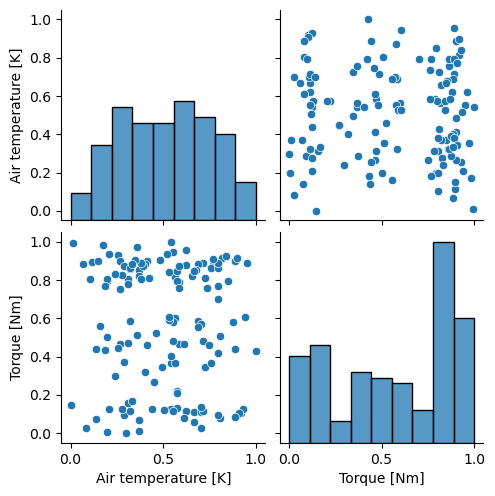

In [13]:
#оцениваем скаттерограммы и гистрограммы наших признаков
%matplotlib inline
sns.pairplot(X)
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# iterate over classifiers

for name, clf in zip(names, classifiers):

    #3. Построить указанные в задании классификаторы для указанных классов.
    clf.fit(X_train.values, y_train)
    
    #4. Применить классификаторы к каждой паре из указанных в варианте задания признаков.
    score = clf.score(X_test.values, y_test)
    
    #6. Получить оценку качества классификации - матрицу ошибок, показатели качества, roc-кривую
    clf_pred = clf.predict(X_test.values)
    clf_acc = accuracy_score(y_test, clf_pred)
    print(name)
    print(classification_report(y_test, clf_pred, target_names = target_names))
        
    

Logistic Regression
                   precision    recall  f1-score   support

    Power Failure       0.72      0.94      0.82        31
Tool Wear Failure       0.00      0.00      0.00        11

         accuracy                           0.69        42
        macro avg       0.36      0.47      0.41        42
     weighted avg       0.54      0.69      0.60        42

Nearest Neighbors 3
                   precision    recall  f1-score   support

    Power Failure       0.97      1.00      0.98        31
Tool Wear Failure       1.00      0.91      0.95        11

         accuracy                           0.98        42
        macro avg       0.98      0.95      0.97        42
     weighted avg       0.98      0.98      0.98        42



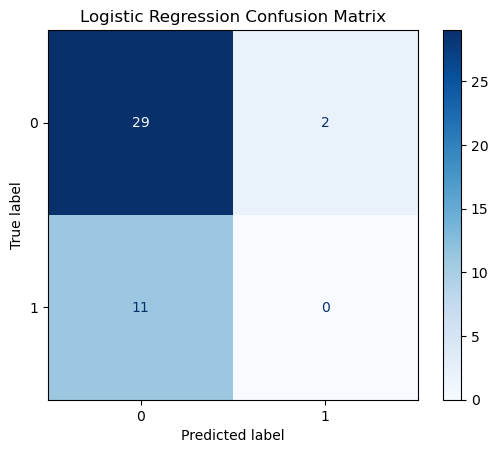

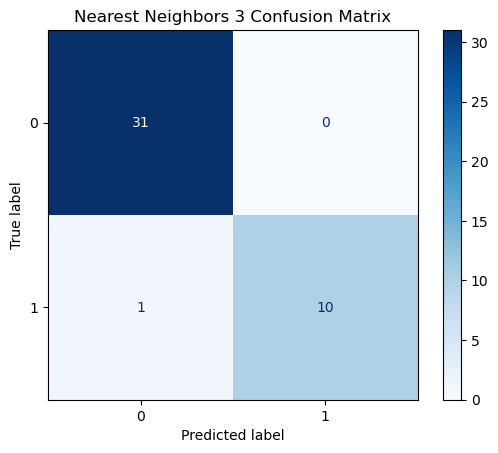

In [15]:
#%matplotlib notebook
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for name, clf in zip(names, classifiers):
    clf.fit(X_train.values, y_train)
    clf_pred = clf.predict(X_test.values)
    cm = confusion_matrix(y_test, clf_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay.from_estimator(clf, X_test.values, y_test, 
                                                 display_labels=clf.classes_,
                                                cmap=plt.cm.Blues)
    disp.ax_.set_title(name + " Confusion Matrix")  

In [16]:
#5. Построить разделяющие границы для каждого классификатора и каждой пары признаков.
h = .01  # step size in the mesh

x_min, x_max = X.min()[x_label] - 0.1, X.max()[x_label] + 0.1
y_min, y_max = X.min()[y_label] - 0.1, X.max()[y_label] + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
 
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cmap_light = ListedColormap(['blue', 'orange', 'green'])
cmap_bold = ListedColormap(['darkblue', 'darkorange', 'darkgreen'])

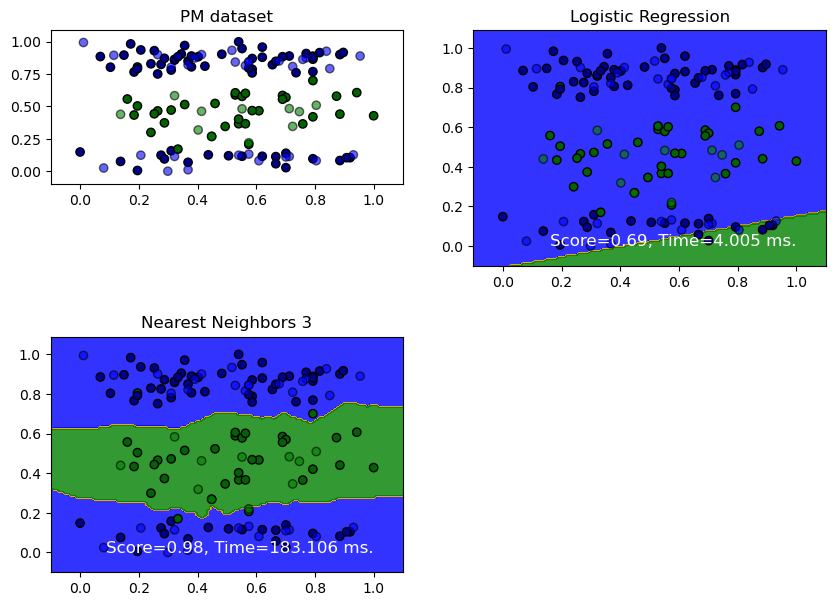

In [17]:
#%matplotlib notebook
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import time

fig = plt.figure(figsize=(10,15))

# Draw dataset

ax = plt.subplot(6, 2, 1)

# Plot the training points
ax.scatter(x=X_train[x_label], y=X_train[y_label], c=y_train, cmap=cmap_bold, alpha=1.0, edgecolor="black")
ax.scatter(x=X_test[x_label], y=X_test[y_label], c=y_test, cmap=cmap_light, alpha=0.6, edgecolor="black")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_title("PM dataset")

# iterate over classifiers
i = 2
for name, clf in zip(names, classifiers):
    ax = plt.subplot(4, 2, i)
    t0 = time.time()
    
    clf.fit(X_train.values, y_train)
    score = clf.score(X_test.values, y_test)
    
    clf_pred = clf.predict(X_test.values)
    clf_acc = accuracy_score(y_test, clf_pred)
        
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    t1 = time.time()
  
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=.8)
   
    # Plot the training points
    ax.scatter(x=X_train[x_label], y=X_train[y_label], c=y_train, cmap=cmap_bold, alpha=1.0, edgecolor="black")
    ax.scatter(x=X_test[x_label], y=X_test[y_label], c=y_test, cmap=cmap_light, alpha=0.6, edgecolor="black")
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(name)
    
    dt=(t1 - t0)*1000
    ax.text(xx.max() - .1, yy.min() + .1, ('Score=%.2f, Time=%.3f ms.' % (score,dt)).lstrip('0'), 
            size=12, horizontalalignment='right', color='w')
    i += 1
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

In [18]:
# prepare for binary classification
y = df['TargetF']
#y=np.where(y == 2, 0, y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.6,random_state=123, stratify=y)

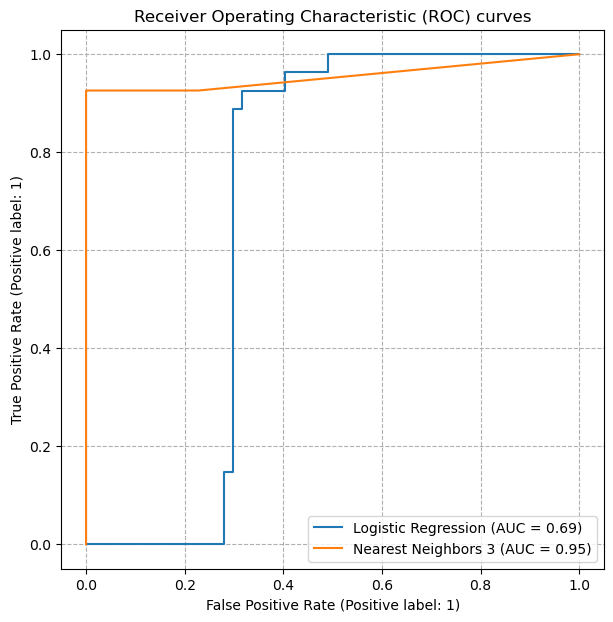

In [19]:
from sklearn.metrics import RocCurveDisplay 
# prepare plots
fig, ax_roc = plt.subplots(figsize=(7, 7))
    
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)   
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
    
ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_roc.grid(linestyle="--")


==========================
==========================
Выводы:
На данном датасете модель логистической регрессии не справилась с классификацией на Power Failure и Tool Wear Failure по признакам Air temperature [K] и Torque [Nm]. Precision и Recall для Tool Wear Failure составили 0.
Метод К ближайших соседей при К = 3 справился в тех же условиях прилично: accuracy составляет 0.98. Для данного метода площадь под кривой ROC также была больше, чем для логистической регрессии (0.95 и 0.69 соответственно). 
Причины полученных результатов видны на скаттерограмме с разделением границ: логистическая регрессия не смогла построить разделяющую границу на таких данных, т.к. полноценно разделить такие данные одной прямой невозможно.
